In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
import warnings

# Ignore deprecation warnings for cleaner output
warnings.filterwarnings("ignore", category=DeprecationWarning)

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Setting Jedha color palette as default for Plotly
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=[
        "#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"
    ]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg"

In [3]:
dataset = pd.read_csv ("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/ex2data1.txt",sep=",", header=None)
dataset.columns = ["0", "1", "2"]
dataset.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# Basic statistics and dataset overview
print("Dataset Overview:")
print(f"Number of rows: {dataset.shape[0]}")
print(f"Number of columns: {dataset.shape[1]}")
print()

# Display first few rows of the dataset
print("Preview of the dataset:")
display(dataset.head())
print()

# Basic statistics
print("Basic statistics for numerical and categorical columns:")
data_desc = dataset.describe(include="all")
display(data_desc)
print()

# Percentage of missing values for each column
print("Percentage of missing values in each column:")
missing_values = 100 * dataset.isnull().sum() / dataset.shape[0]
display(missing_values)

Dataset Overview:
Number of rows: 100
Number of columns: 3

Preview of the dataset:


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1



Basic statistics for numerical and categorical columns:


,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000



Percentage of missing values in each column:


0    0.0
1    0.0
2    0.0
dtype: float64

Rename the columns using the following names :

"Col_1" / "Col_2" / "Target"

In [8]:
#####
#solution Jedha

#col_names = {
#    0: "Col_1",
#    1: "Col_2",
#    2: "Target"
#}

#data = data.rename(columns= col_names)

#data.head()
#####

In [7]:
dataset_renamed = dataset.rename(columns={"0": "Col_1", "1": "Col_2", "2": "Target"})
dataset_renamed.head()

,Col_1,Col_2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Visualize the data as a scatter plot where the two different classes are displayed with different colors.

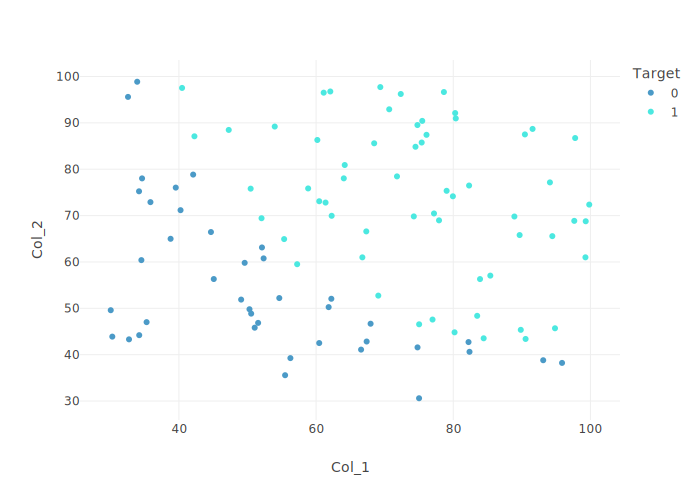

In [9]:
fig = px.scatter(dataset_renamed, x = 'Col_1', y = 'Col_2', color = dataset_renamed['Target'].astype('str'), labels = {'color': 'Target'})
fig.show()

Separate X and y into two different objects.

In [11]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "Target"

X = dataset_renamed.drop(columns=[target_variable])
y = dataset_renamed[target_variable]

print("...Done.")
print()

print("y (Target variable):")
print(y.head())
print("\nX (Features):")
print(X.head())

Separating labels from features...
...Done.

y (Target variable):
0    0
1    0
2    0
3    1
4    1
Name: Target, dtype: int64

X (Features):
       Col_1      Col_2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376


Split the data into a train set and a test set

In [14]:
# Divide dataset into Train and Test sets
print("Dividing dataset into train and test sets...")
# Using stratify=Y to ensure balanced class distribution in both sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)
print("Dataset division complete.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print()

Dividing dataset into train and test sets...
Dataset division complete.
Training set size: 80 samples
Test set size: 20 samples



Do you think that the two variables "Col_1" and "Col_2" would be good predictors of the target?

Distribution of Col_1:


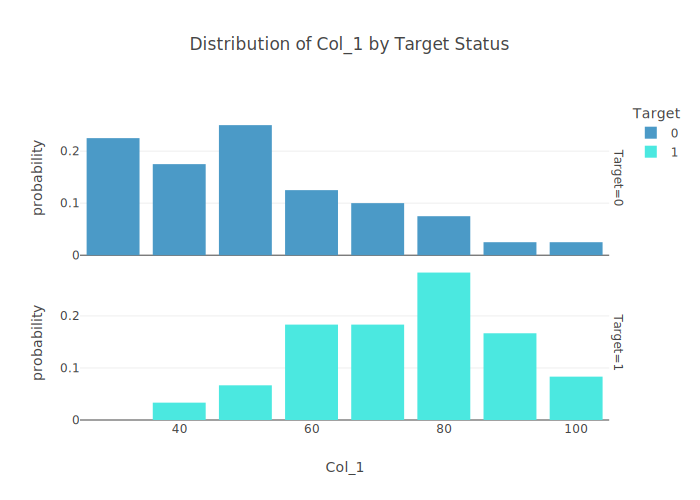

Distribution of Col_2:


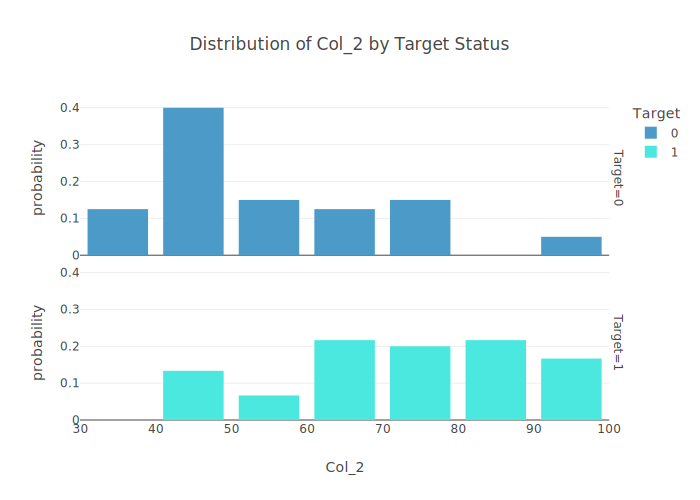

In [16]:
# Univariate Analysis - Distribution of each numeric variable
num_features = ["Col_1", "Col_2"]

# Loop through each numeric feature and plot distribution
for feature in num_features:
    if feature in dataset_renamed.columns:
        print(f"Distribution of {feature}:")
        fig = px.histogram(
            dataset_renamed,
            x=feature,
            color="Target",
            facet_row="Target",
            histnorm="probability",
            title=f"Distribution of {feature} by Target Status"
        )
        fig.update_layout(bargap=0.2)  # Optional: adjust bar gap for readability
        fig.show()
    else:
        print(f"Feature '{feature}' not found in dataset columns.")

The distributions of "Col_1"and "Col_2" seem quite different depending on the values of the target variable. So we can be quite confident that these features will be useful to predict the value of Target 🤞

Analyze the explanatory variables, what preprocessings are necessary? Make the preprocessings.

In [17]:
# Basic statistics
print("Basic statistics for numerical and categorical columns:")
data_desc = dataset_renamed.describe(include="all")
display(data_desc)
print()

Basic statistics for numerical and categorical columns:


,Col_1,Col_2,Target
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Some good news:

There are no missing values in this dataset --> no imputation needed

Although we're dealing with a classification problem, the Target is alrady encoded as 0s and 1s, so we don't need to use the LabelEncoder

All the features (Col1 and Col2) are numeric, so we just want to apply a StandardScaler to the whole array X

In [18]:
# Preprocessing X_train with scaling
print("Preprocessing X_train with StandardScaler...")
print("Before scaling:")
print(X_train[:5])
print()

preprocessor = StandardScaler()
X_train = preprocessor.fit_transform(X_train)

print("After scaling (first 5 samples):")
print(X_train[:5, :])
print("...Done!\n")

# Preprocessing X_test with scaling
print("Preprocessing X_test with StandardScaler...")
print("Before scaling (first 5 samples):")
print(X_test[:5])
print()

X_test = preprocessor.transform(X_test)

print("After scaling (first 5 samples):")
print(X_test[:5, :])
print("...Done!\n")

Preprocessing X_train with StandardScaler...
Before scaling:
        Col_1      Col_2
33  52.045405  69.432860
55  49.586677  59.808951
63  30.058822  49.592974
12  82.307053  76.481963
17  67.946855  46.678574

After scaling (first 5 samples):
[[-0.6800032   0.25200598]
 [-0.80559859 -0.27354284]
 [-1.80310994 -0.83142369]
 [ 0.86580602  0.63694808]
 [ 0.13226613 -0.99057517]]
...Done!

Preprocessing X_test with StandardScaler...
Before scaling (first 5 samples):
        Col_1      Col_2
47  97.771599  86.727822
19  76.978784  47.575964
39  34.183640  75.237720
68  80.279574  92.116061
88  78.635424  96.647427

After scaling (first 5 samples):
[[ 1.65575761  1.19646075]
 [ 0.59363022 -0.94156992]
 [-1.59240823  0.56900164]
 [ 0.76223941  1.49070525]
 [ 0.67825384  1.73815711]]
...Done!



Use the LogisticRegression function from sklearn in order to create a model instance and train it.

In [19]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("Model training complete.")

Training Logistic Regression model...
Model training complete.


What's the accuracy on the train set ? and on the test set ?

In [24]:
# The .score() method from LogisticRegression returns the accuracy of the model
train_accuracy = classifier.score(X_train, Y_train)
test_accuracy = classifier.score(X_test, Y_test)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")

Train accuracy: 0.88
Test accuracy: 0.95


What's the average score with a cross-validation using K=10, what's the score's standard deviation?

In [25]:
# Perform cross-validation
scores = cross_val_score(classifier, X_train, Y_train, cv=10)
avg = scores.mean()
std = scores.std()

print(f"Cross-validated accuracy: {avg:.2f}")
print(f"Standard deviation: {std:.2f}")

Cross-validated accuracy: 0.88
Standard deviation: 0.11


Is the model underfitting/overfitting?

The test accuracy seems a bit higher than the train accuracy, which is usually not possible (it's as if a student who had not learnt his lesson would miraculously get very good results at the final exam 😇)... This doesn't correspond to underfitting nor overfitting 🤔

Actually, the cross-validation shows that the score can typically vary by ±0.11 just by switching some examples between train and test set. We can conclude that there's no significant difference between the train score and the test score! The model has a good balance between bias and variance, which is as good news!

Create objects containing the model's predictions on the train/test sets, as well as the estimated probabilities

In [26]:
# Predictions on training set
print("Generating predictions on the training set...")
Y_train_pred = classifier.predict(X_train)
print("Predictions on training set complete.")
print("Predicted labels:")
print(Y_train_pred)
print()

# Obtaining probabilities estimated by the model
print("Calculating probabilities on the training set...")
Y_train_proba = classifier.predict_proba(X_train)
print("Probability estimates complete.")
print("Predicted probabilities (first 5 samples):")
print(Y_train_proba[:5])  # Affiche les 5 premières probabilités pour une vue d'ensemble
print()

Generating predictions on the training set...
Predictions on training set complete.
Predicted labels:
[0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 0]

Calculating probabilities on the training set...
Probability estimates complete.
Predicted probabilities (first 5 samples):
[[0.51987908 0.48012092]
 [0.79508535 0.20491465]
 [0.98881632 0.01118368]
 [0.02113941 0.97886059]
 [0.69498618 0.30501382]]



In [27]:
# Predictions on test set
print("Generating predictions on the test set...")
Y_test_pred = classifier.predict(X_test)
print("Predictions on test set complete.")
print("Predicted labels for test set:")
print(Y_test_pred)
print()

# Obtaining probabilities estimated by the model on test set
print("Calculating probabilities on the test set...")
Y_test_proba = classifier.predict_proba(X_test)
print("Probability estimates complete.")
print("Predicted probabilities (all samples):")
print(Y_test_proba)
print()

Generating predictions on the test set...
Predictions on test set complete.
Predicted labels for test set:
[1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1]

Calculating probabilities on the test set...
Probability estimates complete.
Predicted probabilities (all samples):
[[0.00144361 0.99855639]
 [0.44592351 0.55407649]
 [0.79170369 0.20829631]
 [0.0050762  0.9949238 ]
 [0.00373719 0.99626281]
 [0.48877258 0.51122742]
 [0.05004609 0.94995391]
 [0.00285711 0.99714289]
 [0.01265569 0.98734431]
 [0.72989781 0.27010219]
 [0.72412987 0.27587013]
 [0.89999178 0.10000822]
 [0.07182228 0.92817772]
 [0.36214544 0.63785456]
 [0.23242127 0.76757873]
 [0.91805156 0.08194844]
 [0.66595924 0.33404076]
 [0.00998885 0.99001115]
 [0.70120905 0.29879095]
 [0.01640185 0.98359815]]



Display the confusion matrix derived from the predictions performed by your model on the training data, do the same on your test data. What do you think of your model's performance, do you think it would generalize well on unknown data?

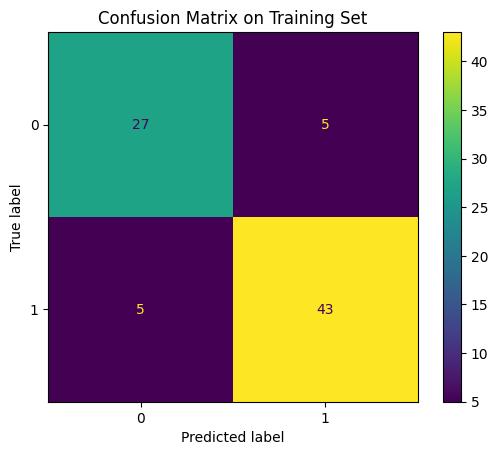

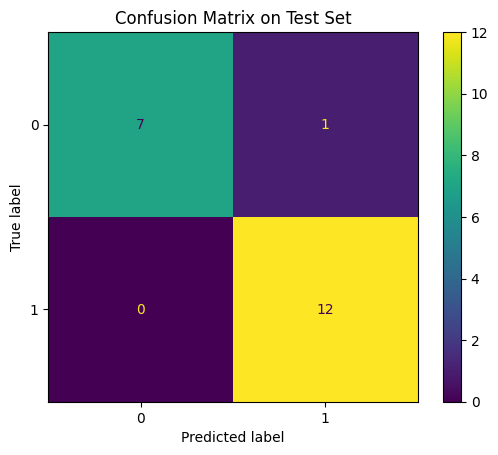

In [28]:
# Visualize confusion matrix for training set
fig, ax = plt.subplots()
ax.set_title("Confusion Matrix on Training Set")
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.show()

# Visualize confusion matrix for test set
fig, ax = plt.subplots()
ax.set_title("Confusion Matrix on Test Set")
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()

From the questions above, we can deduce that the generalized performances are very good ! Indeed, the test accuracy is comparable to the train accuracy and we can see in the confusion matrix that the prediction errors are very rare 🥳🥳

Produce the ROC curve for the train set and the test set

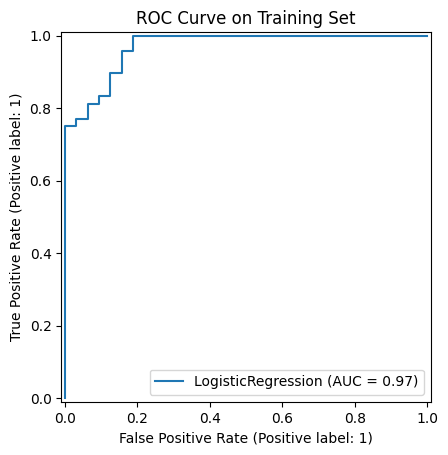

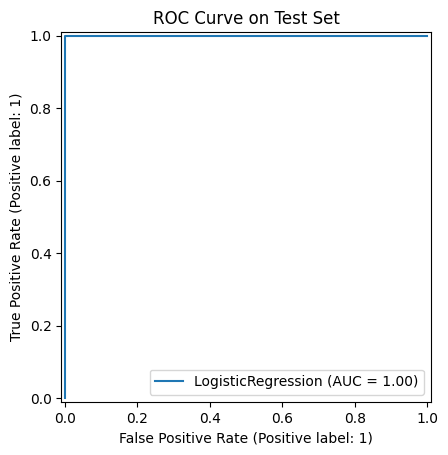

In [30]:
# Visualize ROC curve for training set
fig, ax = plt.subplots()
ax.set_title("ROC Curve on Training Set")
RocCurveDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.show()

# Visualize ROC curve for test set
fig, ax = plt.subplots()
ax.set_title("ROC Curve on Test Set")
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.show()

The area under the curves is quite close to 1. This means that the model is robust as it does not depend on the choice of the threshold used in the logistic regression.